# Text Classification  

by Christoph Guettner

**Abstract:**  Here, we use Shakespeare's Macbeth and   
many songtexts from Lenard Cohen to build a classifaction   
model. The classifaction model is then used to classify   
quotes from Partrick Rothfuss to be either like Shakespeare  
or like Cohen.    
To build the model a multinominal Naive Bayes algorithm is used.   
To vectorize the input data (feature extraction) a tfidf counting   
is used to provide the elements of the input matrix (feature matrix).  

## Table of Contents
* [Loading and Preprocessing](#Loading_and_Preprocessing)
    * [Imports](#Imports)
    * [Functions](#Functions)

* [Load Data](#Load_Data)
    * [Preprocessing](#Preprocessing)
    * [Vectorization](#Vectorization)

* [Build Model](#Build_Model)
    * [Train_Predict](#Train_Predict)
    * [Evaluate](#Evaluate)
    * [get learning curve](#get_learning_curve)

* [Classify quotes](#Classify_quotes)



In [67]:
import os
import pandas as pd
import numpy as np
from collections import Counter

import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords

import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score

In [68]:
def remove_empty_lines(lines):
    Non_emtpy=[]
    for line in lines:
        if line.strip():
            Non_emtpy.append(line)
    return Non_emtpy

def equalize_inputs(more_input, equal_input):
    Equal = []
    for i in range(len(equal_input)):
        sample=np.random.choice(more_input)
        Equal.append(sample)
    return Equal, equal_input

def print_semantic_input(features):
    for i in range(100):
        look = tfidf.inverse_transform(features[i])
        print(look[0])

def get_learning_curve(features, y):
    train_size=np.linspace(0.1, 1.0, 20)
    train_sizes, train_scores, test_scores = learning_curve(MultinomialNB(), features, y,                                                                              train_sizes=train_size, cv=7)

    train_scores_means = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_means = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    return train_sizes, train_scores_means,train_scores_std,test_scores_means, test_scores_std


def plot_learning_curve(train_sizes, train_scores_means, train_scores_std,test_scores_means, test_scores_std):
    fig, ax = plt.subplots(1, figsize = (15,5))
    fig.suptitle('Learning_Curves', color ='0.7' )
    ax.plot(train_sizes, test_scores_means, label='Test')
    ax.plot(train_sizes, train_scores_means, label='Train')
    ax.fill_between(train_sizes, train_scores_means - train_scores_std,
                        train_scores_means + train_scores_std, alpha=0.1,
                        color="orange")
    ax.fill_between(train_sizes, test_scores_means - test_scores_std,
                        test_scores_means + test_scores_std, alpha=0.1,
                        color="blue")
    ax.legend(loc="best")

def classify_quotes(quotes, model):
    features_quotes = tfidf.transform(quotes)
    for i in range(len(quotes)):
        answer= model.predict_proba(features_quotes[i])
        if answer[0][0] < 0.5:
            print('Sounds like a Sentence from Cohen with probability {}'.format(answer[0][1]))
        else:
            print('Sounds like a Sentence from Shakespeare with probability {}'.format(answer[0][0]))
      

## Load_Data

In [69]:

Cohen_doc = open(".\\Data\\LCohen\\Cohen.txt" , "r")
Cohen_lines = Cohen_doc.readlines()
Cohen_doc.close()

Shakespeare_doc = open('.\\Data\\books\\Macbeth.txt' , "r")
Shakespeare_lines = Shakespeare_doc.readlines()
Cohen_doc.close()

In [70]:
Cohen = remove_empty_lines(Cohen_lines)
Shakespeare = remove_empty_lines(Shakespeare_lines)

In [71]:
Shakespeare_eq, Cohen_eq = equalize_inputs(Shakespeare, Cohen)
len(Cohen_eq)==len(Shakespeare_eq)

True

In [72]:
#label and combine both within a dataframe
dictionary= {'label':[0]*len(Shakespeare_eq)+[1]*len(Cohen_eq), 'words':Shakespeare_eq + Cohen_eq}
df_both = pd.DataFrame(dictionary)

In [73]:
x = df_both.words
y = df_both.label

### train test split

In [74]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Vectorize

In [75]:

tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2))
features_train = tfidf.fit_transform(X_train)
features_test = tfidf.transform(X_test)

df_train = pd.DataFrame(
    features_train.todense(),columns=tfidf.get_feature_names())

df_train.shape




(2499, 3385)

## Have a look in the semantics of the data

In [76]:
#prints first 100 input lines. try if you can find the author
print_semantic_input(features_test)

['don' 'baby']
['you re' 'you' 'with' 're' 'love' 'in love' 'in' 'if you' 'if']
['the one' 'the' 'that' 'seems' 'one that' 'one' 'except']
['was' 'traitor' 'my' 'mother' 'father']
['to my' 'to' 'old' 'my' 'age']
['once again' 'once' 'again once' 'again']
['you' 'where are' 'where' 'to' 'said' 'myself' 'golden' 'boy' 'are you'
 'are']
['you say' 'you' 'what' 'say' 'heard']
['where' 'we' 'the night' 'the' 'night' 'lay' 'has been' 'has' 'been']
['your man' 'your' 'man']
['your' 'woman' 'well' 'sleeping' 'is' 'his woman' 'his' 'free' 'enemy'
 'and his' 'and']
['your perfect' 'your' 'perfect offering' 'perfect' 'offering'
 'forget your' 'forget']
['which' 'war' 'towards' 'the war' 'the']
['macbeth' 'lady macbeth' 'lady']
['you' 'of every' 'of' 'in' 'full' 'every' 'command']
['you' 'the' 'so' 'out' 'had so' 'had' 'as you' 'as' 'and']
['woman' 'thereâ' 'the' 'in the' 'in']
['their' 'seem' 'must' 'it' 'for it' 'for']
['vienna' 'there' 'in vienna' 'in']
['my love' 'my' 'love' 'hello my' 'hello'

## Build Model  

Buidling a Multinomial Naive Bayes Classifier. 

In [77]:
clf = MultinomialNB()
model = clf.fit(features_train, y_train)

In [78]:
pred = model.predict(features_test)
pred_model = model.predict(features_train)


## Evaluation

### Model Performance on the test data

In [79]:
accuracy_score(y_test, pred)

0.8704

### Model Performance on the training data

In [84]:
accuracy_score(y_train, pred_model)


0.9443777511004402

### Comparing to dump classifier (guessing 50/50)

In [81]:
dump_classifier_test = [0]*len(y_test)
accuracy_score(dump_classifier_test, pred)

0.4688

## Learning Curve

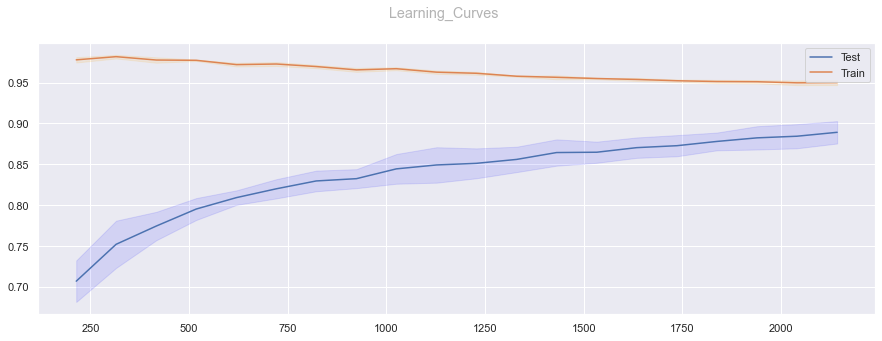

In [82]:

train_sizes,train_scores_means,train_scores_std,test_scores_means, test_scores_std = get_learning_curve(features_train, y_train)
plot_learning_curve(train_sizes,train_scores_means,train_scores_std,test_scores_means, test_scores_std)

## Using the model to classify Patrick Rothfuss

In [83]:
quotes = [
'There are three things all wise men fear the sea in storm, a night with no moon, and the anger of a gentle man',

"Music sounds different to the one who plays it. It is the musician's curse",

"It is the questions we can't answer that teach us the most. They teach us how to think",

'All the truth in the world is held in stories',

'Knowing your own ignorance is the first step to enlightenment',

'I have waited a long time to show these flowers how pretty you are', 

'We understand how dangerous a mask can be. We all become what we pretend to be']

classify_quotes(quotes, model)


Sounds like a Sentence from Cohen with probability 0.6625188709313441
Sounds like a Sentence from Cohen with probability 0.7022596466527958
Sounds like a Sentence from Shakespeare with probability 0.6580928173835171
Sounds like a Sentence from Cohen with probability 0.7158803595045065
Sounds like a Sentence from Shakespeare with probability 0.7471732721478114
Sounds like a Sentence from Cohen with probability 0.5328563349805123
Sounds like a Sentence from Cohen with probability 0.6207660893462263
